## ODI Cricket Matches Analysis Between 1971-2017

This project is about "ODI Cricket Matches Analysis Between 1971-2017" Data Analysis with Python. Dataset is taken from "Kaggle" which is the world's largest data science community with powerful tools and resources.

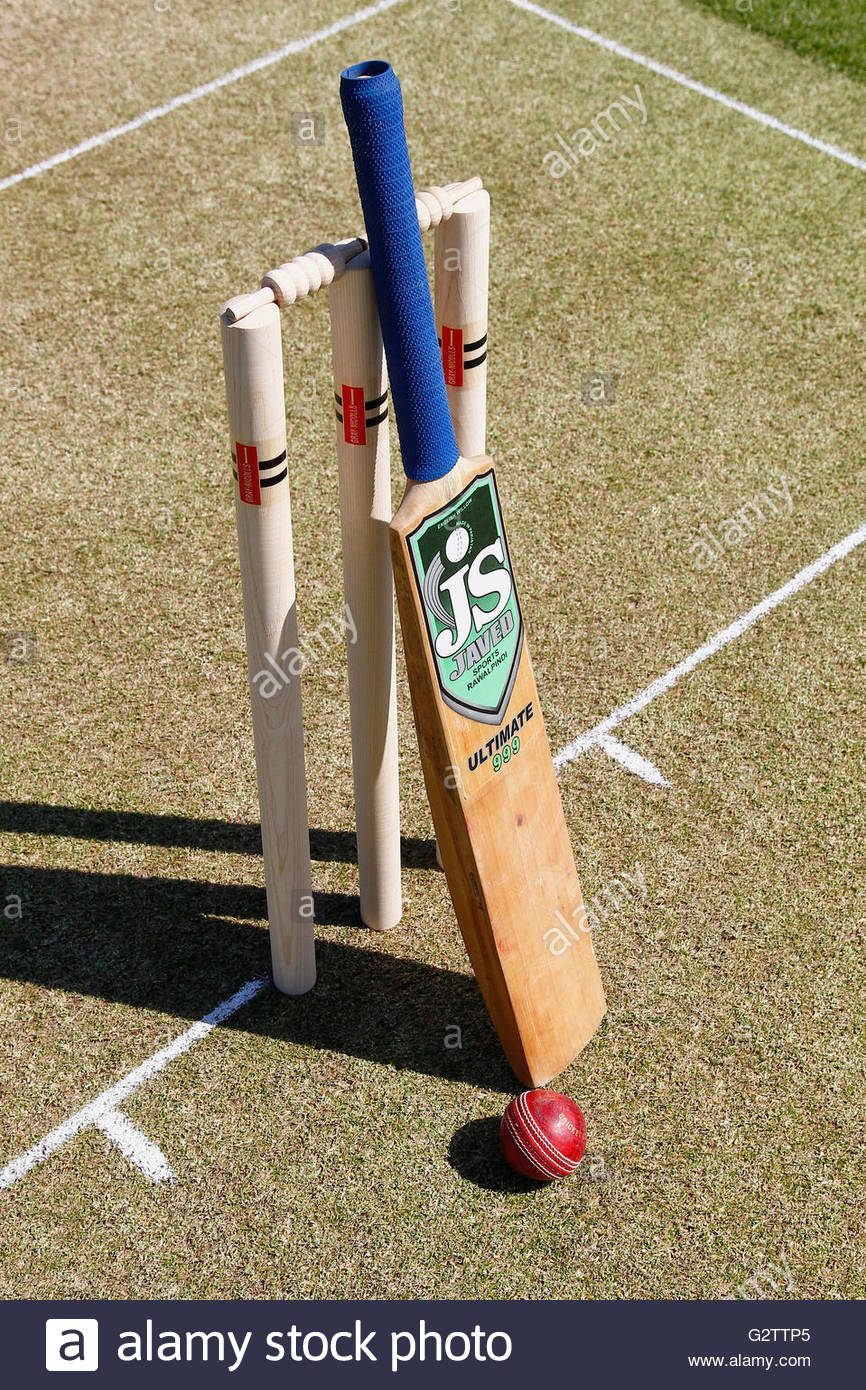

This dataset contains 3932 rows and 7 columns which is really informaive to analysis. Various kinds of information like number of matches played, winning percentage, most ODI wins by team and many things analyzed in this project.

## Downloading the Dataset



> - Link of Dataset: https://www.kaggle.com/jaykay12/odi-cricket-matches-19712017
> - This dataset is in CSV format and contains 7 columns and 3932 rows
> - Downloaded the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Change this
dataset_url = 'https://www.kaggle.com/jaykay12/odi-cricket-matches-19712017' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kowshikchakraborty
Your Kaggle Key: ··········


100%|██████████| 330k/330k [00:00<00:00, 37.1MB/s]

The dataset has been downloaded and extracted.

In [5]:
# Change this
data_dir = './odi-cricket-matches-19712017'

In [6]:
import os
os.listdir(data_dir)

['originalDataset.csv',
 'CategoricalDataset.csv',
 'ContinousDataset.csv',
 'LabelledDataset.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "odi-cricket-matches-analysis-between-1971-2017"

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kowshikchakraborty6/odi-cricket-matches-analysis-between-1971-2017


'https://jovian.ai/kowshikchakraborty6/odi-cricket-matches-analysis-between-1971-2017'

## Data Preparation and Cleaning


> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [11]:
import pandas as pd

In [12]:
odi_matches_df = pd.read_csv('odi-cricket-matches-19712017/originalDataset.csv') 

In [13]:
odi_matches_df

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [14]:
odi_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   3932 non-null   object
 1   Team 1      3932 non-null   object
 2   Team 2      3932 non-null   object
 3   Winner      3932 non-null   object
 4   Margin      3753 non-null   object
 5   Ground      3932 non-null   object
 6   Match Date  3932 non-null   object
dtypes: object(7)
memory usage: 215.2+ KB


In [15]:
odi_matches_df.columns

Index(['Scorecard', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date'],
      dtype='object')

In [16]:
odi_matches_df.shape

(3932, 7)

In [17]:
odi_matches_df.describe()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
count,3932,3932,3932,3932,3753,3932,3932
unique,3932,24,25,25,227,173,3386
top,ODI # 94,Australia,Sri Lanka,Australia,6 wickets,Sharjah,"Feb 4, 2007"
freq,1,583,508,555,347,228,6


In [18]:
odi_matches_df.isnull().sum()

Scorecard       0
Team 1          0
Team 2          0
Winner          0
Margin        179
Ground          0
Match Date      0
dtype: int64

In [19]:
odi_matches_df.fillna(value=0, inplace=True)
odi_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   3932 non-null   object
 1   Team 1      3932 non-null   object
 2   Team 2      3932 non-null   object
 3   Winner      3932 non-null   object
 4   Margin      3932 non-null   object
 5   Ground      3932 non-null   object
 6   Match Date  3932 non-null   object
dtypes: object(7)
memory usage: 215.2+ KB


In [20]:
odi_matches_df

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [21]:
odi_matches_df.rename(columns = {"Team 1": "Team_1", "Team 2": "Team_2", "Match Date": "Match_Date"}, inplace=True)
odi_matches_df

,Scorecard,Team_1,Team_2,Winner,Margin,Ground,Match_Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [22]:
import jovian

In [23]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kowshikchakraborty6/odi-cricket-matches-analysis-between-1971-2017


'https://jovian.ai/kowshikchakraborty6/odi-cricket-matches-analysis-between-1971-2017'

## Exploratory Analysis and Visualization




Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Exploring Max, Min and Mean Functions.

In [25]:
odi_matches_df.Match_Date.max()

'Sep 9, 2011'

In [26]:
odi_matches_df.Match_Date.min()

'Apr 1, 1984'

In [27]:
odi_matches_df.mean()

Series([], dtype: float64)

Exploring the Winner column.

In [28]:
odi_matches_df.Winner.value_counts()

Australia       555
India           476
Pakistan        469
West Indies     380
Sri Lanka       372
South Africa    361
England         343
New Zealand     324
no result       140
Zimbabwe        129
Bangladesh      105
Ireland          51
Kenya            42
Afghanistan      42
tied             34
Scotland         31
Netherlands      28
Canada           17
U.A.E.            9
Bermuda           7
Hong Kong         6
P.N.G.            5
Asia XI           4
Africa XI         1
ICC World XI      1
Name: Winner, dtype: int64

In [29]:
print(odi_matches_df.Winner.unique())
print('Total Winners:',odi_matches_df.Winner.nunique())

['Australia' 'England' 'New Zealand' 'no result' 'West Indies' 'Pakistan'
 'India' 'Sri Lanka' 'Zimbabwe' 'tied' 'South Africa' 'Kenya' 'U.A.E.'
 'Bangladesh' 'Canada' 'Netherlands' 'ICC World XI' 'Africa XI' 'Asia XI'
 'Bermuda' 'Ireland' 'Scotland' 'Afghanistan' 'P.N.G.' 'Hong Kong']
Total Winners: 25


Exploring the number of Grounds and other things in Bar chart.

In [30]:
print('Total Grounds:',odi_matches_df.Ground.nunique())

Total Grounds: 173


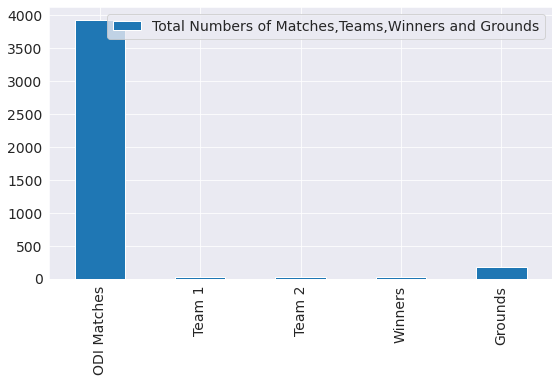

In [31]:
plotdata = pd.DataFrame({"Total Numbers of Matches,Teams,Winners and Grounds": [odi_matches_df.Scorecard.count(), odi_matches_df.Team_1.nunique(), odi_matches_df.Team_2.nunique(), odi_matches_df.Winner.nunique(), odi_matches_df.Ground.nunique()]}, index=["ODI Matches","Team 1", "Team 2", "Winners", "Grounds"])

plotdata.plot(kind="bar")

Exploring most matches won by single team at away.

In [32]:
odi_matches_2_df = pd.read_csv('odi-cricket-matches-19712017/ContinousDataset.csv')
odi_matches_2_df

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,3747,ODI # 3931,New Zealand,India,Winner2ndInning,Pune,"Oct 25, 2017",India,India,Away,Home,First,Second
7490,3748,ODI # 3932,New Zealand,India,Winner1stInning,Kanpur,"Oct 29, 2017",India,India,Away,Home,Second,First
7491,3749,ODI # 3933,Namibia,Hong Kong,Winner2ndInning,Mumbai,"Aug 12, 2017",Namibia,India,Neutral,Neutral,Second,First
7492,3750,ODI # 3934,U.S.A.,Bermuda,Winner2ndInning,Mumbai,"Aug 12, 2017",U.S.A.,India,Neutral,Neutral,Second,First


In [33]:
odi_matches_2_df.loc[odi_matches_2_df.Venue_Team1 == 'Away'].Winner.value_counts().idxmax()

'Australia'

In [34]:
away_winners = odi_matches_2_df.loc[odi_matches_2_df.Venue_Team1 == 'Away'].Winner.value_counts()
away_winners.reset_index()

,index,Winner
0,Australia,439
1,India,311
2,England,275
3,South Africa,269
4,West Indies,259
5,Sri Lanka,249
6,Pakistan,247
7,New Zealand,238
8,Zimbabwe,95
9,Bangladesh,88


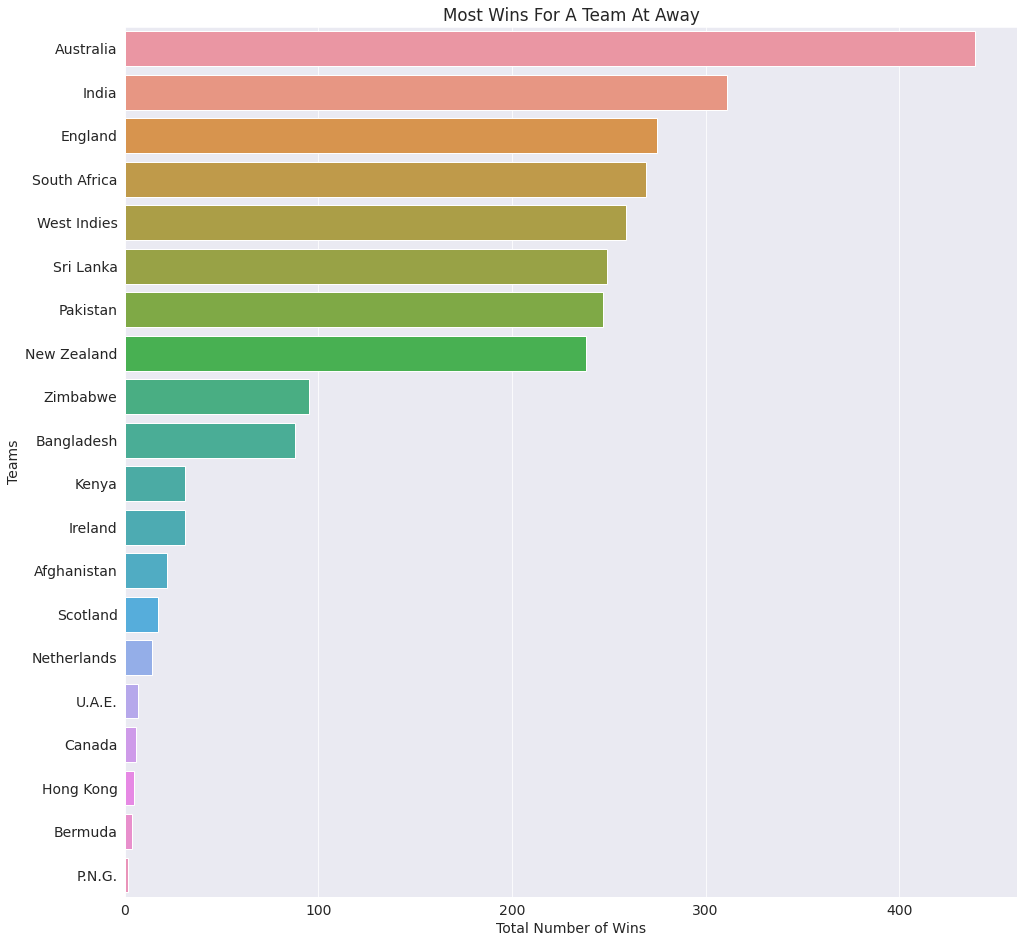

In [35]:
plt.figure(figsize=(16,16))
sns.barplot(x=away_winners, y=away_winners.index)
plt.xlabel("Total Number of Wins")
plt.ylabel("Teams");
plt.title('Most Wins For A Team At Away');

Let us save and upload our work to Jovian before continuing

In [36]:
import jovian

In [37]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kowshikchakraborty6/odi-cricket-matches-analysis-between-1971-2017


'https://jovian.ai/kowshikchakraborty6/odi-cricket-matches-analysis-between-1971-2017'

## Asking and Answering Questions




> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: What Are The Winning Percentages By A Team Accroding To Scorecard?

In [38]:
x,y = odi_matches_2_df.shape

winner_count = odi_matches_2_df.loc[:,["Winner","Scorecard"]].groupby("Winner").count()
winner_count["Percentage (%)"] = round(winner_count["Scorecard"]*100/x,0);
winner_count = winner_count.sort_values("Scorecard",ascending=False)
winner_count

,Scorecard,Percentage (%)
Winner,,
Australia,1104,15.0
India,950,13.0
Pakistan,932,12.0
West Indies,760,10.0
Sri Lanka,742,10.0
South Africa,722,10.0
England,686,9.0
New Zealand,648,9.0
Zimbabwe,258,3.0


In [39]:
reseting_index = winner_count['Percentage (%)']
reseting_index.reset_index()

,Winner,Percentage (%)
0,Australia,15.0
1,India,13.0
2,Pakistan,12.0
3,West Indies,10.0
4,Sri Lanka,10.0
5,South Africa,10.0
6,England,9.0
7,New Zealand,9.0
8,Zimbabwe,3.0
9,Bangladesh,3.0


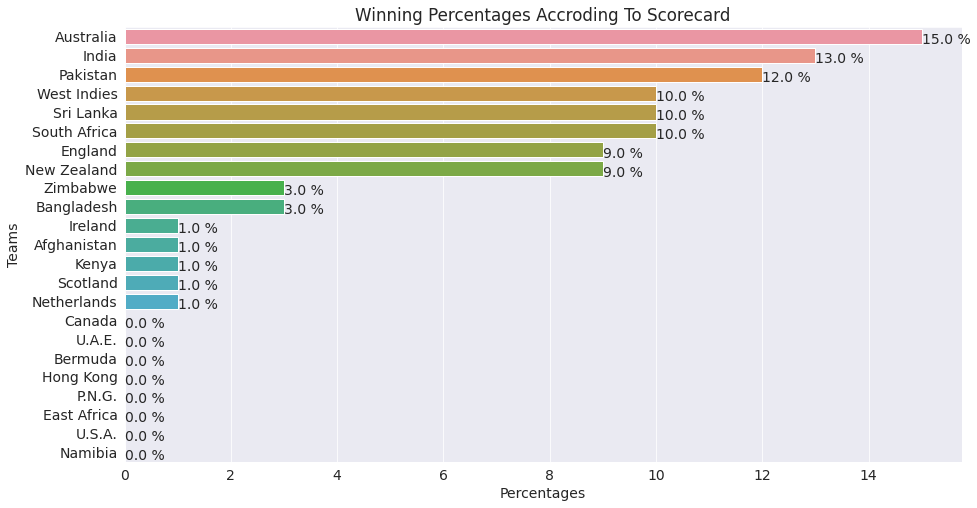

In [40]:
plt.figure(figsize= (15, 8))
ax = sns.barplot(x=reseting_index, y=reseting_index.index)
plt.title('Winning Percentages Accroding To Scorecard')
plt.xlabel('Percentages')
plt.ylabel('Teams')

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} %'.format(width))



#### Q2: How Many ODI Matches Played Per Year?

In [41]:
odi_matches_2_df['Year'] = odi_matches_2_df['Match Date'].str[-4:]
yearwise = odi_matches_2_df[['Year']].value_counts()/2
yearwise = yearwise.reset_index()
yearwise.columns =['Year', 'Matches']
yearwise = yearwise.sort_values(by='Year',ascending=True)
yearwise = yearwise.reset_index()
yearwise = yearwise.drop(columns=['index'])
yearwise

,Year,Matches
0,1971,1.0
1,1972,3.0
2,1973,4.0
3,1974,6.0
4,1975,17.0
5,1976,6.0
6,1977,6.0
7,1978,9.0
8,1979,25.0
9,1980,21.0


<function matplotlib.pyplot.show>

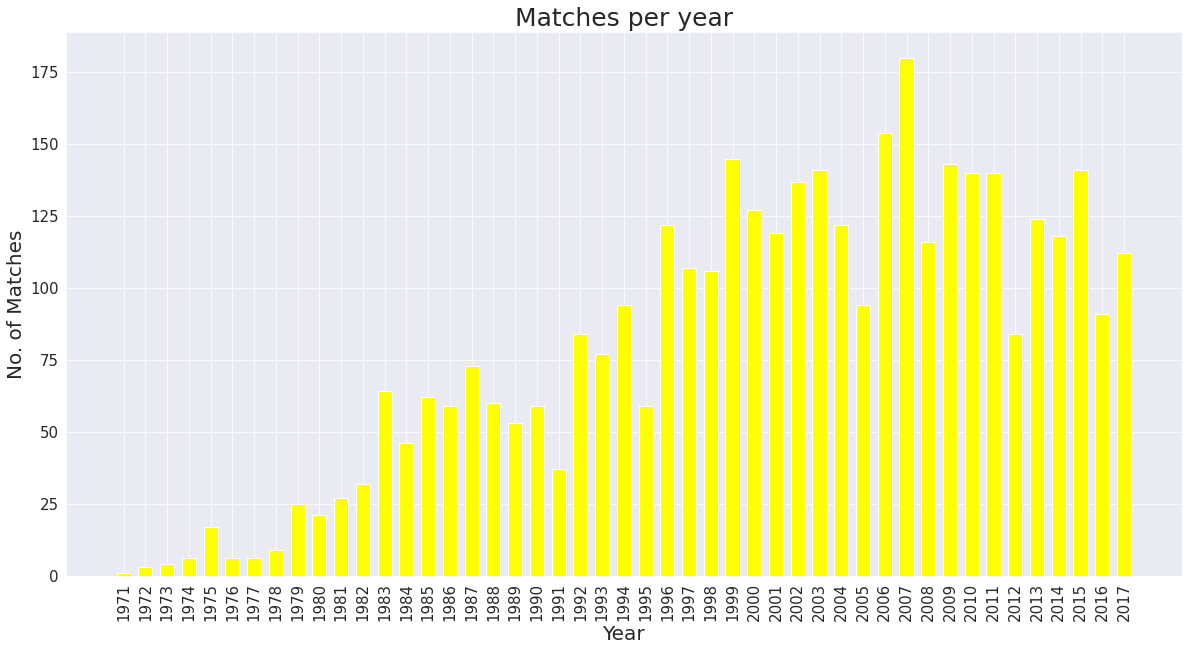

In [42]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
plt.bar(yearwise['Year'], yearwise['Matches'], width=0.65, color='Yellow')
plt.xticks(rotation='vertical', size=15)
plt.yticks(size=15)
plt.xlabel('Year', size=20)
plt.ylabel('No. of Matches', size=20)
plt.title('Matches per year', size=25)
plt.show

#### Q3: How Many ODI Matches Played By Team?

In [43]:
group1=odi_matches_2_df.groupby("Team 1").size().rename("Team_1")
group2=odi_matches_2_df.groupby("Team 2").size().rename("Team_2")
total=pd.concat([group1,group2],axis=1).fillna(0)
total["Total_Matches"]=total["Team_1"]+total["Team_2"]
total

,Team_1,Team_2,Total_Matches
Afghanistan,81,81,162
Australia,859,859,1718
Bangladesh,328,328,656
Bermuda,36,36,72
Canada,75,75,150
East Africa,4,4,8
England,664,664,1328
Hong Kong,18,18,36
India,880,880,1760
Ireland,113,113,226


Text(0.5, 1.0, 'ODI Matches Played By Team')

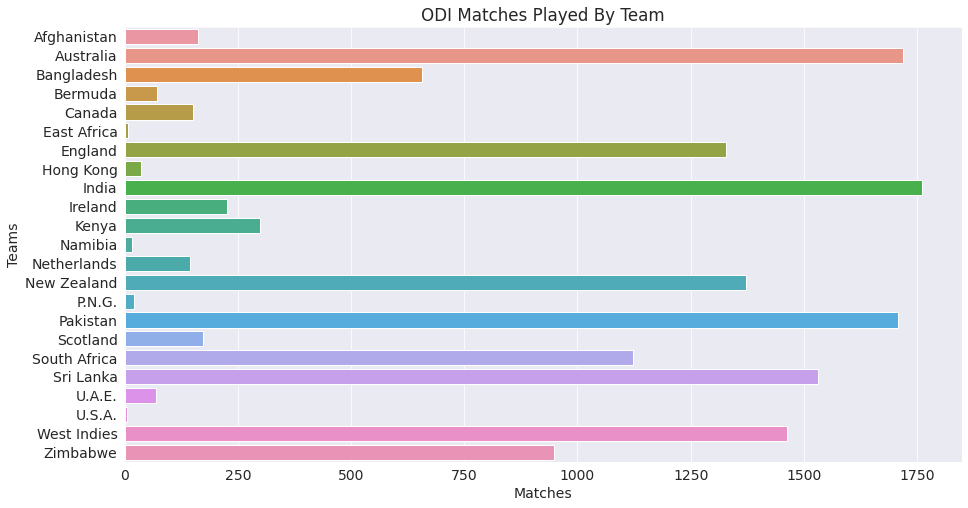

In [44]:
plt.figure(figsize= (15, 8))
sns.barplot(x=total['Total_Matches'],y=total.index)
plt.ylabel("Teams")
plt.xlabel("Matches")
plt.title("ODI Matches Played By Team")



#### Q4: What Are The Rankings Of Teams That Won Most ODI Matches?

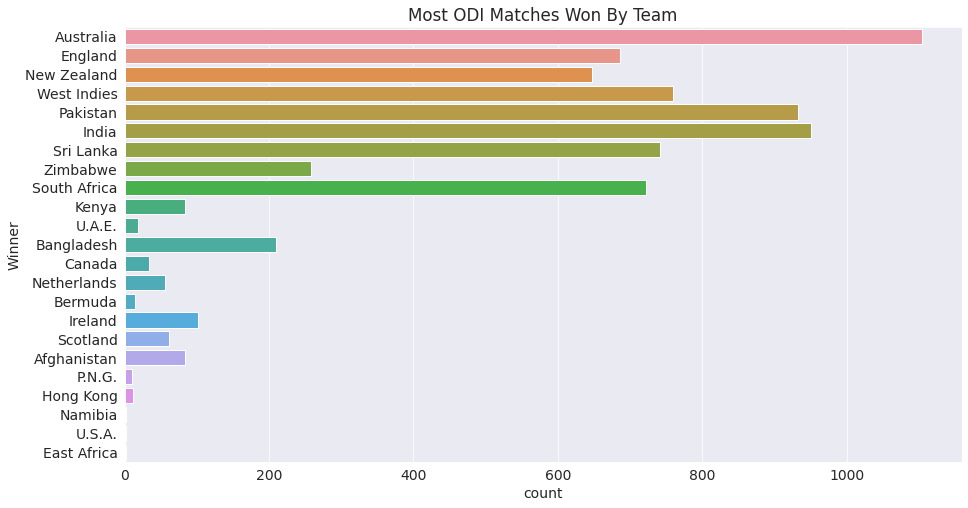

In [45]:
plt.figure(figsize= (15, 8))
sns.countplot(y='Winner', data=odi_matches_2_df)
plt.title('Most ODI Matches Won By Team')
plt.show()

#### Q5: What Are The Number Of Matches Played By Team In Home, Away and Neutral?

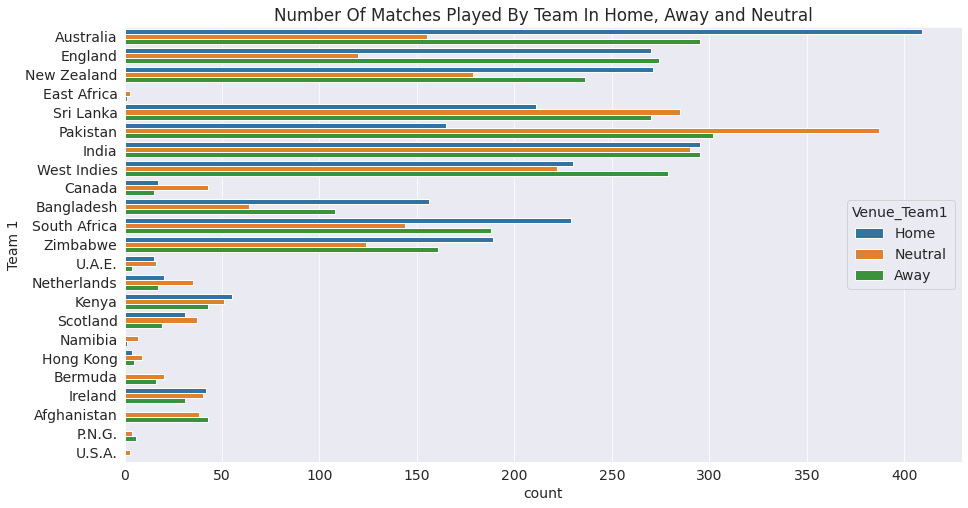

In [46]:
plt.figure(figsize= (15, 8))
sns.countplot(y='Team 1',hue='Venue_Team1',data=odi_matches_2_df)
plt.title('Number Of Matches Played By Team In Home, Away and Neutral')
plt.show()

Let us save and upload our work to Jovian before continuing.

In [47]:
import jovian

In [48]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kowshikchakraborty6/odi-cricket-matches-analysis-between-1971-2017


'https://jovian.ai/kowshikchakraborty6/odi-cricket-matches-analysis-between-1971-2017'

## Inferences and Conclusion

That'a all about the "ODI Cricket Matches Analysis". There more things that can be analyzed and some codes that can be improved in future.

In [49]:
import jovian

In [53]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kowshikchakraborty6/odi-cricket-matches-analysis-between-1971-2017


'https://jovian.ai/kowshikchakraborty6/odi-cricket-matches-analysis-between-1971-2017'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [51]:
import jovian

In [52]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kowshikchakraborty6/odi-cricket-matches-analysis-between-1971-2017


'https://jovian.ai/kowshikchakraborty6/odi-cricket-matches-analysis-between-1971-2017'